
Resultados das médias de Bandwidth:

----------------------------------------------------------------------

Arquivo: etapa1_com_media.csv

Médias por rodada (ID):
ID
-    84.991111
0    85.800000
1    81.710000
2    85.390000
3    85.250000
4    85.240000
5    85.370000
6    85.470000
7    85.290000
8    85.400000

Média geral: 84.99 Megabits/segundo
Intervalo de confiança (95%): ± 3.18
----------------------------------------------------------------------

Arquivo: etapa2_com_media.csv

Médias por rodada (ID):
ID
-    31.065992
0    31.072815
1    31.035037
2    31.101741
3    31.075815
4    31.101704
5    31.046148
6    31.053556
7    31.020222
8    31.086889

Média geral: 31.07 Megabits/segundo
Intervalo de confiança (95%): ± 1.96
----------------------------------------------------------------------

Arquivo: ETAPA3_aggregated.csv

Médias por rodada (ID):
ID
0    22.134500
1    25.363500
2    22.750500
3    27.904565
5    21.783250
6    23.713750
7    24.302564
8    28.445250

Mé

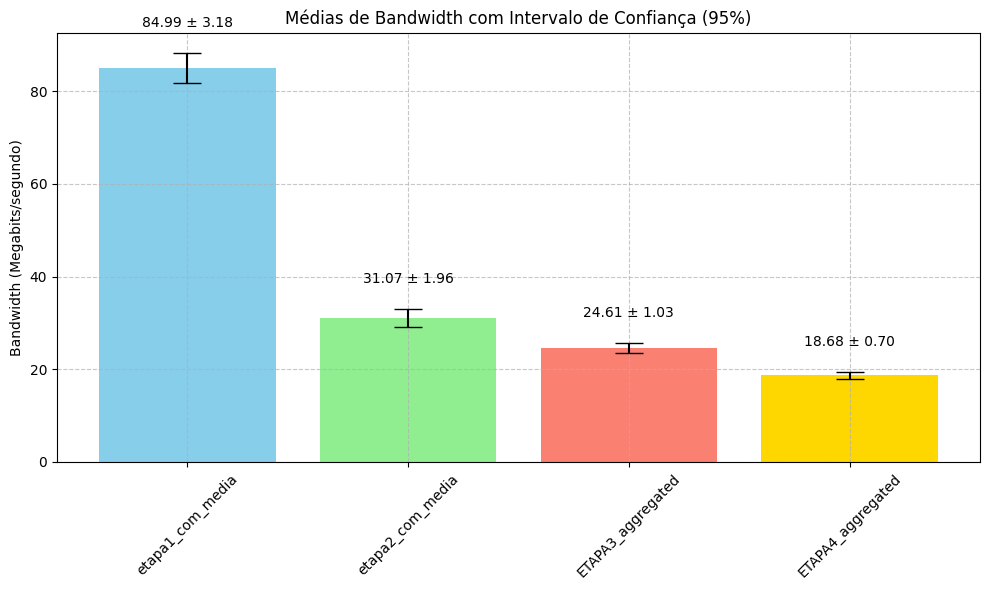

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def calcular_medias_e_ic(nome_arquivo):
    """Calcula médias e intervalo de confiança para um arquivo CSV"""
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(nome_arquivo)
        
        # Verificar colunas necessárias
        colunas_necessarias = ['ID', 'Bandwidth']
        for col in colunas_necessarias:
            if col not in df.columns:
                raise ValueError(f"Coluna '{col}' não encontrada no arquivo {nome_arquivo}")
        
        # Calcular média por rodada (ID)
        medias_por_rodada = df.groupby('ID')['Bandwidth'].mean()
        
        # Calcular média geral e intervalo de confiança (95%)
        media_geral = df['Bandwidth'].mean()
        desvio_padrao = df['Bandwidth'].std()
        n = len(df['Bandwidth'])
        erro = stats.norm.ppf(0.975) * desvio_padrao / np.sqrt(n)  # IC 95%
        
        return {
            'nome_arquivo': nome_arquivo,
            'medias_por_rodada': medias_por_rodada,
            'media_geral': media_geral,
            'intervalo_confianca': erro,
            'dados': df['Bandwidth']
        }
    except Exception as e:
        print(f"Erro ao processar arquivo {nome_arquivo}: {str(e)}")
        return None

def plotar_grafico_ic(resultados):
    """Cria gráfico com intervalos de confiança para cada arquivo"""
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Preparar dados para o gráfico
    nomes = [res['nome_arquivo'].replace('.csv', '') for res in resultados]
    medias = [res['media_geral'] for res in resultados]
    ics = [res['intervalo_confianca'] for res in resultados]
    
    # Criar barras com intervalos de confiança
    barras = ax.bar(nomes, medias, yerr=ics, capsize=10, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
    
    # Configurações do gráfico
    ax.set_ylabel('Bandwidth (Megabits/segundo)')
    ax.set_title('Médias de Bandwidth com Intervalo de Confiança (95%)')
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Adicionar valores nas barras
    for bar, media, ic in zip(barras, medias, ics):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + ic + 5,
                f'{media:.2f} ± {ic:.2f}',
                ha='center', va='bottom')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("grafico_ic_bandwidth.png", dpi=300)
    plt.show()

def main():
    # Lista de arquivos a serem processados
    arquivos = [
        'etapa1_com_media.csv',
        'etapa2_com_media.csv',
        'ETAPA3_aggregated.csv',
        'ETAPA4_aggregated.csv'
    ]
    
    resultados = []
    
    # Processar cada arquivo
    for arquivo in arquivos:
        resultado = calcular_medias_e_ic(arquivo)
        if resultado is not None:
            resultados.append(resultado)
    
    # Exibir resultados numéricos
    print("\nResultados das médias de Bandwidth:\n")
    print("-" * 70)
    for res in resultados:
        print(f"\nArquivo: {res['nome_arquivo']}")
        print("\nMédias por rodada (ID):")
        print(res['medias_por_rodada'].to_string())
        print(f"\nMédia geral: {res['media_geral']:.2f} Megabits/segundo")
        print(f"Intervalo de confiança (95%): ± {res['intervalo_confianca']:.2f}")
        print("-" * 70)
    
    # Plotar gráfico com intervalos de confiança
    if resultados:
        plotar_grafico_ic(resultados)

if __name__ == "__main__":
    main()